
##**Project Objective**

To develop a machine learning classification model to predict weight categories (obesity, normal weight,overweight, and insufficient weight) using relevant demographic, lifestyle, and health-related factors. This model is aimed at helping healthcare providers and policymakers better understand weight-related risk factors, enabling targeted interventions.

#**Business Objectives**

**Health Risk Assessment**:

Classify individuals into weight categories based on predictor variables, enabling early intervention for those at risk of obesity or insufficient weight.

**Targeted Wellness Programs:**

Support the design of health initiatives by identifying high-risk groups and tailoring wellness programs accordingly. Personalized Preventative Measures: Provide personalized recommendations to individuals based on their classification to promote healthier habits and reduce long-term health risks.

**Public Health Policy:**

Offer data-driven insights to assist in shaping public health policies focused on promoting balanced nutrition and physical activity.

**Technical Objective:**

To develop a classification model utilizing the following predictors:



*   Demographics: Age, Height, Weight
*   Diet and Lifestyle: Eat_Vegetables, Meal_count, Smoking_Habit, Water_intake, Calorie_Monitoring


* Physical Activity and Behavior: Physical_activity_freq, Screen_Time_Duration, Travel_Mode

*   
Obesity_level(Target): Target variable indicating obesity, overweight, or insufficient weight category

The model's performance was evaluated using the F1-score to balance precision and recall, given the importance of accurate classification in each weight category.










In [1]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
url = "https://raw.githubusercontent.com/Ingit13/Obesity-Classification/main/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#changing the names of the columns
df = df.rename(columns={'FAVC': 'High_Caloric', 'FCVC': 'Eat_Vegetables','NCP':'Meal_count','CAEC':'Snack_Frequency','SMOKE':
                        "Smoking_Habit",'CH2O':"Water_intake",'SCC':'Calorie_Monitoring'
                        ,'FAF':'physical_activity_freq',
                        'TUE':'Screen_Time_Duration',
                        'CALC':'Alcohol_Usage','MTRANS':'Travel_Mode','NObeyesdad':'Obesity_level(Target)'})
df.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric,Eat_Vegetables,Meal_count,Snack_Frequency,Smoking_Habit,Water_intake,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Alcohol_Usage,Travel_Mode,Obesity_level(Target)
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
df.shape

(2111, 17)

In [6]:
df.sample(8)

,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric,Eat_Vegetables,Meal_count,Snack_Frequency,Smoking_Habit,Water_intake,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Alcohol_Usage,Travel_Mode,Obesity_level(Target)
802,Female,19.816228,1.507853,64.259379,no,yes,2.568063,3.000000,Sometimes,no,1.817983,yes,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
762,Male,22.549208,1.629194,70.000000,no,yes,2.000000,1.000000,no,no,2.803311,no,0.245354,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
1444,Female,23.652435,1.562724,80.535698,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.389717,0.000000,no,Public_Transportation,Obesity_Type_I
664,Female,21.997683,1.689441,51.107925,yes,yes,3.000000,3.715118,Frequently,no,1.774576,no,0.102970,0.646423,no,Public_Transportation,Insufficient_Weight
1584,Male,30.577343,1.868923,125.064264,yes,yes,2.050619,3.000000,Sometimes,yes,1.515183,no,0.849811,0.261901,Sometimes,Public_Transportation,Obesity_Type_II
1816,Female,24.265943,1.719365,114.511537,yes,yes,3.000000,3.000000,Sometimes,no,2.987406,no,0.389260,0.526776,Sometimes,Public_Transportation,Obesity_Type_III
1134,Female,21.001282,1.517998,64.696248,yes,no,2.123900,1.672958,Sometimes,no,2.000000,no,1.582428,1.313363,no,Public_Transportation,Overweight_Level_II
691,Male,18.000000,1.786758,51.524444,no,yes,2.915480,3.000000,Sometimes,no,1.777486,no,1.077469,1.000000,Sometimes,Public_Transportation,Insufficient_Weight


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   High_Caloric                    2111 non-null   object 
 6   Eat_Vegetables                  2111 non-null   float64
 7   Meal_count                      2111 non-null   float64
 8   Snack_Frequency                 2111 non-null   object 
 9   Smoking_Habit                   2111 non-null   object 
 10  Water_intake                    2111 non-null   float64
 11  Calorie_Monitoring              2111 non-null   object 
 12  physical_activity_freq          21

In [8]:
df.describe()

,Age,Height,Weight,Eat_Vegetables,Meal_count,Water_intake,physical_activity_freq,Screen_Time_Duration
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
df.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Smoking_Habit,0
Travel_Mode,0
Alcohol_Usage,0
Screen_Time_Duration,0
physical_activity_freq,0
Calorie_Monitoring,0
Water_intake,0
Snack_Frequency,0
Age,0


In [10]:
#feature engineerting(BMI)
df['BMI']=df['Height']/df['Weight']

In [11]:
df.drop(['Height','Weight'],axis=1,inplace=True)

In [12]:
#feature enginnering(hydration per meal)
df['hydration_per_meal']=df['Water_intake']/df['Meal_count']


In [13]:
df.drop(['Water_intake'],axis=1,inplace=True)

In [14]:
df.head(10)

,Gender,Age,family_history_with_overweight,High_Caloric,Eat_Vegetables,Meal_count,Snack_Frequency,Smoking_Habit,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Alcohol_Usage,Travel_Mode,Obesity_level(Target),BMI,hydration_per_meal
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0.025313,0.666667
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0.027143,1.000000
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.023377,0.666667
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.020690,0.666667
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.019822,2.000000
5,Male,29.0,no,yes,2.0,3.0,Sometimes,no,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,0.030566,0.666667
6,Female,23.0,yes,yes,3.0,3.0,Sometimes,no,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,0.027273,0.666667
7,Male,22.0,no,no,2.0,3.0,Sometimes,no,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0.030943,0.666667
8,Male,24.0,yes,yes,3.0,3.0,Sometimes,no,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.027813,0.666667
9,Male,22.0,yes,yes,2.0,3.0,Sometimes,no,no,1.0,1.0,no,Public_Transportation,Normal_Weight,0.025294,0.666667


In [15]:
fig = px.histogram(df, x="Gender", color="Obesity_level(Target)",
                   title="Obesity Levels by Gender",
                   labels={"Gender": "Gender", "Obesity_level(Target)": "Obesity Level", "count": "Count"},
                   category_orders={"Obesity_level(Target)": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                                            'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                            'Obesity_Type_III']})

fig.show()

In [16]:
fig = px.histogram(df, x="Age", color="Obesity_level(Target)",
                   title="Obesity Levels by Age",
                   labels={"Age": "Age", "Obesity_level(Target)": "Obesity Level", "count": "Count"},
                   category_orders={"Obesity_level(Target)": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                                            'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                            'Obesity_Type_III']})
fig.show()

In [17]:

fig = px.histogram(df, x="Travel_Mode", color="Obesity_level(Target)",
                   title="Obesity Levels by travel_mode",
                   labels={"Age": "Age", "Obesity_level(Target)": "Obesity Level", "count": "Count"},
                   category_orders={"Obesity_level(Target)": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                                            'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                            'Obesity_Type_III']})
fig.show()

In [18]:
fig = px.scatter(df, x="BMI", y="Obesity_level(Target)",
                 title="BMI vs. Obesity Level",
                 labels={"BMI": "Body Mass Index", "Obesity_level(Target)": "Obesity Level"},
                 category_orders={"Obesity_level(Target)": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                                            'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                            'Obesity_Type_III']})
fig.show()

In [19]:
fig = px.histogram(df, x="family_history_with_overweight", color="Obesity_level(Target)",
                   title="Obesity Levels by Family History of Overweight",
                   labels={"family_history_with_overweight": "Family History of Overweight", "Obesity_level(Target)": "Obesity Level", "count": "Count"},
                   category_orders={"Obesity_level(Target)": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                                            'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                            'Obesity_Type_III']})
fig.show()

In [20]:
fig = px.histogram(df, x="Alcohol_Usage", color="Obesity_level(Target)",
                   title="Obesity Levels by Alcohol_Usage",
                   labels={"Travel_Mode": "Travel Mode", "Obesity_level(Target)": "Obesity Level", "count": "Count"},
                   category_orders={"Obesity_level(Target)": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                                            'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                            'Obesity_Type_III']})
fig.show()

In [21]:
fig = px.histogram(df, x="Smoking_Habit", color="Obesity_level(Target)",
                   title="Obesity Levels by Smoking Habit",
                   labels={"Smoking_Habit": "Smoking Habit", "Obesity_level(Target)": "Obesity Level", "count": "Count"},
                   category_orders={"Obesity_level(Target)": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                                            'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                            'Obesity_Type_III']})
fig.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   High_Caloric                    2111 non-null   object 
 4   Eat_Vegetables                  2111 non-null   float64
 5   Meal_count                      2111 non-null   float64
 6   Snack_Frequency                 2111 non-null   object 
 7   Smoking_Habit                   2111 non-null   object 
 8   Calorie_Monitoring              2111 non-null   object 
 9   physical_activity_freq          2111 non-null   float64
 10  Screen_Time_Duration            2111 non-null   float64
 11  Alcohol_Usage                   2111 non-null   object 
 12  Travel_Mode                     21

In [23]:
numeric_cols=df.select_dtypes(include=np.number)
numeric_cols

,Age,Eat_Vegetables,Meal_count,physical_activity_freq,Screen_Time_Duration,BMI,hydration_per_meal
0,21.000000,2.0,3.0,0.000000,1.000000,0.025313,0.666667
1,21.000000,3.0,3.0,3.000000,0.000000,0.027143,1.000000
2,23.000000,2.0,3.0,2.000000,1.000000,0.023377,0.666667
3,27.000000,3.0,3.0,2.000000,0.000000,0.020690,0.666667
4,22.000000,2.0,1.0,0.000000,0.000000,0.019822,2.000000
...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.676269,0.906247,0.013018,0.576046
2107,21.982942,3.0,3.0,1.341390,0.599270,0.013074,0.668377
2108,22.524036,3.0,3.0,1.414209,0.646288,0.013107,0.684731
2109,24.361936,3.0,3.0,1.139107,0.586035,0.013045,0.950780


In [24]:
categorical_cols=df.select_dtypes(exclude=np.number)
categorical_cols

,Gender,family_history_with_overweight,High_Caloric,Snack_Frequency,Smoking_Habit,Calorie_Monitoring,Alcohol_Usage,Travel_Mode,Obesity_level(Target)
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [25]:

df.head()

,Gender,Age,family_history_with_overweight,High_Caloric,Eat_Vegetables,Meal_count,Snack_Frequency,Smoking_Habit,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Alcohol_Usage,Travel_Mode,Obesity_level(Target),BMI,hydration_per_meal
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0.025313,0.666667
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0.027143,1.000000
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.023377,0.666667
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.020690,0.666667
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.019822,2.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   High_Caloric                    2111 non-null   object 
 4   Eat_Vegetables                  2111 non-null   float64
 5   Meal_count                      2111 non-null   float64
 6   Snack_Frequency                 2111 non-null   object 
 7   Smoking_Habit                   2111 non-null   object 
 8   Calorie_Monitoring              2111 non-null   object 
 9   physical_activity_freq          2111 non-null   float64
 10  Screen_Time_Duration            2111 non-null   float64
 11  Alcohol_Usage                   2111 non-null   object 
 12  Travel_Mode                     21

In [27]:
numeric_cols.columns

Index(['Age', 'Eat_Vegetables', 'Meal_count', 'physical_activity_freq',
       'Screen_Time_Duration', 'BMI', 'hydration_per_meal'],
      dtype='object')

##Checking for outliers


In [28]:
Q1 = df[numeric_cols.columns].quantile(0.01)
Q3 = df[numeric_cols.columns].quantile(0.90)
IQR = Q3 - Q1
print(IQR)

Age                       16.718344
Eat_Vegetables             2.000000
Meal_count                 2.105007
physical_activity_freq     2.000000
Screen_Time_Duration       1.596562
BMI                        0.020728
hydration_per_meal         1.230128
dtype: float64


In [29]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
outliers = ((df[numeric_cols.columns] < lower_bound) | (df[numeric_cols.columns] > upper_bound)).any(axis=1)
df_outliers = df[outliers]
print("Outliers in the whole dataset is : ", df_outliers.shape[0])

Outliers in the whole dataset is :  1


In [31]:
#imputing the outliers
#for col in numeric_cols.columns:
 #   median_value = df[col].median()
  #  df.loc[((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])), col] = median_value

#print("Outliers in the whole dataset is : ", df_outliers.shape[0])

In [32]:
print("Outliers in the whole dataset is : ", df_outliers.shape[0])

Outliers in the whole dataset is :  1


##Mapping the Categorical columns


In [33]:
df.shape

(2111, 16)

#Checking for coorelation

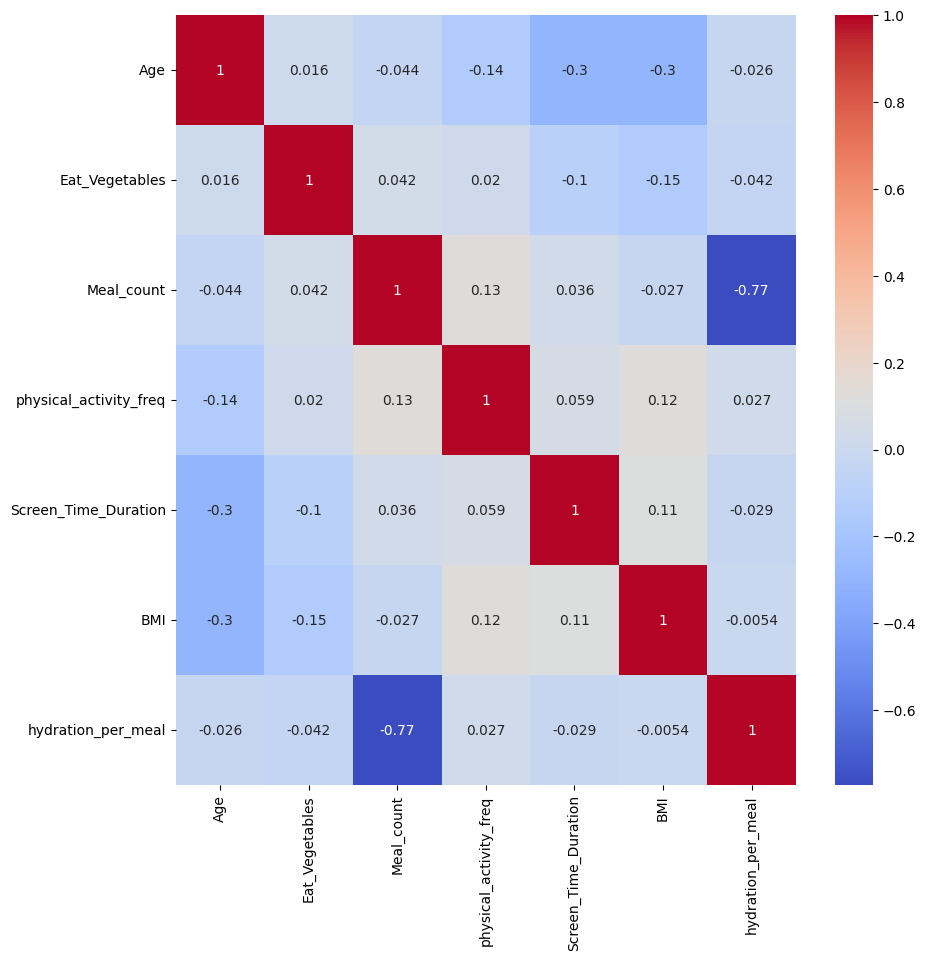

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [35]:
#del df

##Association among categorical columns


In [36]:
#calculating Cramers's V
from scipy.stats import chi2_contingency

# Define a function to calculate Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()

    phi2 = chi2 / n

    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))

    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [37]:
categorical_cols.columns

Index(['Gender', 'family_history_with_overweight', 'High_Caloric',
       'Snack_Frequency', 'Smoking_Habit', 'Calorie_Monitoring',
       'Alcohol_Usage', 'Travel_Mode', 'Obesity_level(Target)'],
      dtype='object')

In [38]:
gender_familyoverweight = pd.crosstab(df['Gender'], df['family_history_with_overweight'])
gender_highcaloric = pd.crosstab(df['Gender'], df['High_Caloric'])
gender_smoke = pd.crosstab(df['Gender'], df['Smoking_Habit'])
gender_Snack_Frequency = pd.crosstab(df['Gender'], df['Snack_Frequency'])
gender_Travel_Mode = pd.crosstab(df['Gender'], df['Travel_Mode'])
gender_Calorie_Monitoring = pd.crosstab(df['Gender'], df['Calorie_Monitoring'])
gender_alcohol = pd.crosstab(df['Gender'], df['Alcohol_Usage'])

familyoverweight_highcaloric = pd.crosstab(df['family_history_with_overweight'], df['High_Caloric'])
familyoverweight_smoke = pd.crosstab(df['family_history_with_overweight'], df['Smoking_Habit'])
familyoverweight_Snack_Frequency = pd.crosstab(df['family_history_with_overweight'], df['Snack_Frequency'])
familyoverweight_Travel_Mode = pd.crosstab(df['family_history_with_overweight'], df['Travel_Mode'])
familyoverweight_Calorie_Monitoring = pd.crosstab(df['family_history_with_overweight'], df['Calorie_Monitoring'])
family_overweight_alcohol = pd.crosstab(df['family_history_with_overweight'], df['Alcohol_Usage'])

high_caloric_snacks = pd.crosstab(df['High_Caloric'], df['Snack_Frequency'])
high_caloric_smoke = pd.crosstab(df['High_Caloric'], df['Smoking_Habit'])
high_caloric_Travel_Mode = pd.crosstab(df['High_Caloric'], df['Travel_Mode'])
high_caloric_Calorie_Monitoring = pd.crosstab(df['High_Caloric'], df['Calorie_Monitoring'])
high_caloric_alcohol = pd.crosstab(df['High_Caloric'], df['Alcohol_Usage'])

snacks_smoke = pd.crosstab(df['Snack_Frequency'], df['Smoking_Habit'])
snacks_Travel_Mode = pd.crosstab(df['Snack_Frequency'], df['Travel_Mode'])
snacks_Calorie_Monitoring = pd.crosstab(df['Snack_Frequency'], df['Calorie_Monitoring'])
snacks_alcohol = pd.crosstab(df['Snack_Frequency'], df['Alcohol_Usage'])

smoke_Travel_Mode = pd.crosstab(df['Smoking_Habit'], df['Travel_Mode'])
smoke_Calorie_Monitoring = pd.crosstab(df['Smoking_Habit'], df['Calorie_Monitoring'])
smoke_alcohol = pd.crosstab(df['Smoking_Habit'], df['Alcohol_Usage'])

calori_monitoring_alcohol = pd.crosstab(df['Calorie_Monitoring'], df['Alcohol_Usage'])
calori_monitoring_travel = pd.crosstab(df['Calorie_Monitoring'], df['Travel_Mode'])

alcohol_travel = pd.crosstab(df['Alcohol_Usage'], df['Travel_Mode'])

In [39]:
#Calculate Cramer's V for each pair


cv_gender_familyoverweight = cramers_v(gender_familyoverweight)
cv_gender_highcaloric = cramers_v(gender_highcaloric)
cv_gender_smoke = cramers_v(gender_smoke)
cv_gender_Snack_Frequency = cramers_v(gender_Snack_Frequency)
cv_gender_Travel_Mode = cramers_v(gender_Travel_Mode)
cv_gender_Calorie_Monitoring = cramers_v(gender_Calorie_Monitoring)
cv_gender_alcohol = cramers_v(gender_alcohol)

cv_familyoverweight_highcaloric = cramers_v(familyoverweight_highcaloric)
cv_familyoverweight_smoke = cramers_v(familyoverweight_smoke)
cv_familyoverweight_Snack_Frequency = cramers_v(familyoverweight_Snack_Frequency)
cv_familyoverweight_Travel_Mode = cramers_v(familyoverweight_Travel_Mode)
cv_familyoverweight_Calorie_Monitoring = cramers_v(familyoverweight_Calorie_Monitoring)
cv_family_overweight_alcohol = cramers_v(family_overweight_alcohol)

cv_high_caloric_snacks = cramers_v(high_caloric_snacks)
cv_high_caloric_smoke = cramers_v(high_caloric_smoke)
cv_high_caloric_Travel_Mode = cramers_v(high_caloric_Travel_Mode)
cv_high_caloric_Calorie_Monitoring = cramers_v(high_caloric_Calorie_Monitoring)
cv_high_caloric_alcohol = cramers_v(high_caloric_alcohol)

cv_snacks_smoke = cramers_v(snacks_smoke)
cv_snacks_Travel_Mode = cramers_v(snacks_Travel_Mode)
cv_snacks_Calorie_Monitoring = cramers_v(snacks_Calorie_Monitoring)
cv_snacks_alcohol = cramers_v(snacks_alcohol)

cv_smoke_Travel_Mode = cramers_v(smoke_Travel_Mode)
cv_smoke_Calorie_Monitoring = cramers_v(smoke_Calorie_Monitoring)
cv_smoke_alcohol = cramers_v(smoke_alcohol)

cv_calori_monitoring_alcohol=cramers_v(calori_monitoring_alcohol)
cv_calori_monitoring_travel=cramers_v(calori_monitoring_travel)

cv_alcohol_travel=cramers_v(alcohol_travel)

In [40]:
def calculate_cramers_v_matrix(data, columns):
    cramers_v_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                contingency_table = pd.crosstab(df[col1], df[col2])
                cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)
            else:
                cramers_v_matrix.loc[col1, col2] = 1.0
    return cramers_v_matrix


In [41]:
categorical_columns = df.select_dtypes(include='object').columns
cramers_v_matrix = calculate_cramers_v_matrix(df, categorical_columns)

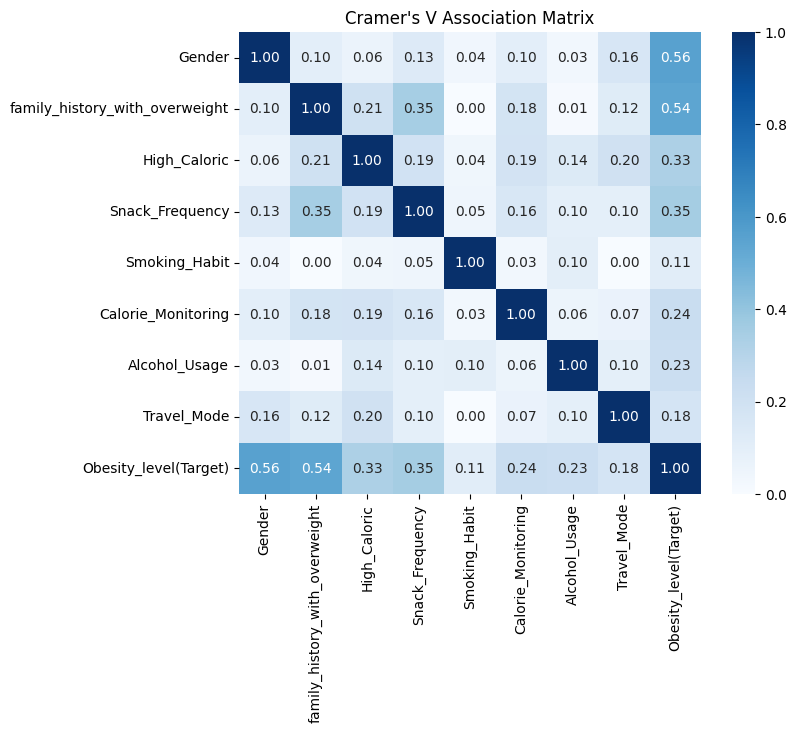

In [42]:
# Visualize the association matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt=".2f")
plt.title("Cramer's V Association Matrix")
plt.show()


Gender

Family over weight

High_caloric,snack_frequency

calorie_monitoring

alcohol_usage

have good association with the target variable thus considerig those only


In [43]:
df.drop(['Smoking_Habit','Travel_Mode'],axis=1,inplace=True)

In [44]:
#df['Gender']=df['Gender'].map({'Female':0,'Male':1})
#df['family_history_with_overweight']=df['family_history_with_overweight'].map({'yes':1,'no':0})
#df['High_Caloric']=df['High_Caloric'].map({'yes':1,'no':0})
#df['Snack_Frequency']=df['Snack_Frequency'].map({'Sometimes':1,'Frequently':2,'Always':3,'no':0})

#df['Calorie_Monitoring']=df['Calorie_Monitoring'].map({'yes':1,'no':0})
#df['Alcohol_Usage']=df['Alcohol_Usage'].map({'Sometimes':1,'Frequently':2,'Always':3,'no':0})

#df['Obesity_level(Target)']=df['Obesity_level(Target)'].map({'Insufficient_Weight':0,
                                                             #'Normal_Weight':1,
                                                             #'Overweight_Level_I':2,
                                                             #'Overweight_Level_II':3,
                                                             #'Obesity_Type_I':4,
                                                             #'Obesity_Type_II':5,
                                                             #'Obesity_Type_III':6})
df.head(10)

,Gender,Age,family_history_with_overweight,High_Caloric,Eat_Vegetables,Meal_count,Snack_Frequency,Calorie_Monitoring,physical_activity_freq,Screen_Time_Duration,Alcohol_Usage,Obesity_level(Target),BMI,hydration_per_meal
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,0.0,1.0,no,Normal_Weight,0.025313,0.666667
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,0.0,Sometimes,Normal_Weight,0.027143,1.000000
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,1.0,Frequently,Normal_Weight,0.023377,0.666667
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,0.0,Frequently,Overweight_Level_I,0.020690,0.666667
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,0.0,0.0,Sometimes,Overweight_Level_II,0.019822,2.000000
5,Male,29.0,no,yes,2.0,3.0,Sometimes,no,0.0,0.0,Sometimes,Normal_Weight,0.030566,0.666667
6,Female,23.0,yes,yes,3.0,3.0,Sometimes,no,1.0,0.0,Sometimes,Normal_Weight,0.027273,0.666667
7,Male,22.0,no,no,2.0,3.0,Sometimes,no,3.0,0.0,Sometimes,Normal_Weight,0.030943,0.666667
8,Male,24.0,yes,yes,3.0,3.0,Sometimes,no,1.0,1.0,Frequently,Normal_Weight,0.027813,0.666667
9,Male,22.0,yes,yes,2.0,3.0,Sometimes,no,1.0,1.0,no,Normal_Weight,0.025294,0.666667


In [45]:
df['Obesity_level(Target)']=df['Obesity_level(Target)'].map({
    'Insufficient_Weight':1,
    'Normal_Weight':2,
    'Overweight_Level_I':3,
    'Overweight_Level_II':4,
    'Obesity_Type_I':5,
   'Obesity_Type_II':6,
    'Obesity_Type_III':7,
    'Obesity_Type_IV':8})

#Final dataframe

In [46]:
df_final=df.copy()

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   High_Caloric                    2111 non-null   object 
 4   Eat_Vegetables                  2111 non-null   float64
 5   Meal_count                      2111 non-null   float64
 6   Snack_Frequency                 2111 non-null   object 
 7   Calorie_Monitoring              2111 non-null   object 
 8   physical_activity_freq          2111 non-null   float64
 9   Screen_Time_Duration            2111 non-null   float64
 10  Alcohol_Usage                   2111 non-null   object 
 11  Obesity_level(Target)           2111 non-null   int64  
 12  BMI                             21

In [48]:
df_final.shape

(2111, 14)

#Building a pipeline

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [50]:
X=df_final.drop('Obesity_level(Target)',axis=1)
y=df_final['Obesity_level(Target)']

In [51]:
numeric_cols=X.select_dtypes(include=np.number)
categorical_cols=X.select_dtypes(exclude=np.number)

In [52]:
print(numeric_cols.columns)
print('*'*100)
print(categorical_cols.columns)

Index(['Age', 'Eat_Vegetables', 'Meal_count', 'physical_activity_freq',
       'Screen_Time_Duration', 'BMI', 'hydration_per_meal'],
      dtype='object')
****************************************************************************************************
Index(['Gender', 'family_history_with_overweight', 'High_Caloric',
       'Snack_Frequency', 'Calorie_Monitoring', 'Alcohol_Usage'],
      dtype='object')


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [54]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [55]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols.columns),
        ('cat', categorical_transformer, categorical_cols.columns)
    ])

##Train Test Split  

In [56]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1477, 13)
(634, 13)
(1477,)
(634,)


In [59]:
#importing the classfication models and f1 score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

##KNN

In [60]:
knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Train the KNN model
knn.fit(X_train,y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_knn))
print(f"F1 Score (KNN): {f1_score(y_test, y_pred_knn, average='weighted')}")

              precision    recall  f1-score   support

           1       0.82      0.98      0.89        86
           2       0.77      0.52      0.62        93
           3       0.75      0.80      0.77        88
           4       0.78      0.73      0.76        79
           5       0.80      0.84      0.82       102
           6       0.90      0.97      0.93        88
           7       0.97      1.00      0.98        98

    accuracy                           0.83       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.83      0.83      0.83       634

F1 Score (KNN): 0.8275538905658888


##Decission Tree

In [61]:
dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the Decision Tree model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))
print(f"F1 Score (Decision Tree): {f1_score(y_test, y_pred_dt, average='weighted')}")

              precision    recall  f1-score   support

           1       0.90      0.86      0.88        86
           2       0.76      0.74      0.75        93
           3       0.73      0.83      0.78        88
           4       0.87      0.76      0.81        79
           5       0.91      0.94      0.92       102
           6       0.97      0.98      0.97        88
           7       1.00      0.99      0.99        98

    accuracy                           0.88       634
   macro avg       0.88      0.87      0.87       634
weighted avg       0.88      0.88      0.88       634

F1 Score (Decision Tree): 0.8755075562980142


##Randomforest classifier

In [62]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)) # Added random_state for reproducibility
])

# Train the Random Forest model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(f"F1 Score (Random Forest): {f1_score(y_test, y_pred_rf, average='weighted')}")

              precision    recall  f1-score   support

           1       0.96      0.94      0.95        86
           2       0.78      0.89      0.83        93
           3       0.88      0.83      0.85        88
           4       0.93      0.86      0.89        79
           5       0.96      0.93      0.95       102
           6       0.97      1.00      0.98        88
           7       1.00      0.99      0.99        98

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634

F1 Score (Random Forest): 0.9233472249791239


##Gradient Boosting

In [63]:
gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train the Gradient Boosting model
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_gb))
print(f"F1 Score (Gradient Boosting): {f1_score(y_test, y_pred_gb, average='weighted')}")

              precision    recall  f1-score   support

           1       0.91      0.93      0.92        86
           2       0.86      0.83      0.84        93
           3       0.89      0.85      0.87        88
           4       0.86      0.87      0.87        79
           5       0.93      0.91      0.92       102
           6       0.93      1.00      0.96        88
           7       1.00      0.99      0.99        98

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634

F1 Score (Gradient Boosting): 0.912784047937709


In [64]:
data = {'Model': ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
        'F1 Score': [f1_score(y_test, y_pred_knn, average='weighted'),
                     f1_score(y_test, y_pred_dt, average='weighted'),
                     f1_score(y_test, y_pred_rf, average='weighted'),
                     f1_score(y_test, y_pred_gb, average='weighted')]}
f1_scores = pd.DataFrame(data)
f1_scores.sort_values(ascending=False,by='F1 Score')

,Model,F1 Score
2,Random Forest,0.923347
3,Gradient Boosting,0.912784
1,Decision Tree,0.875508
0,KNN,0.827554


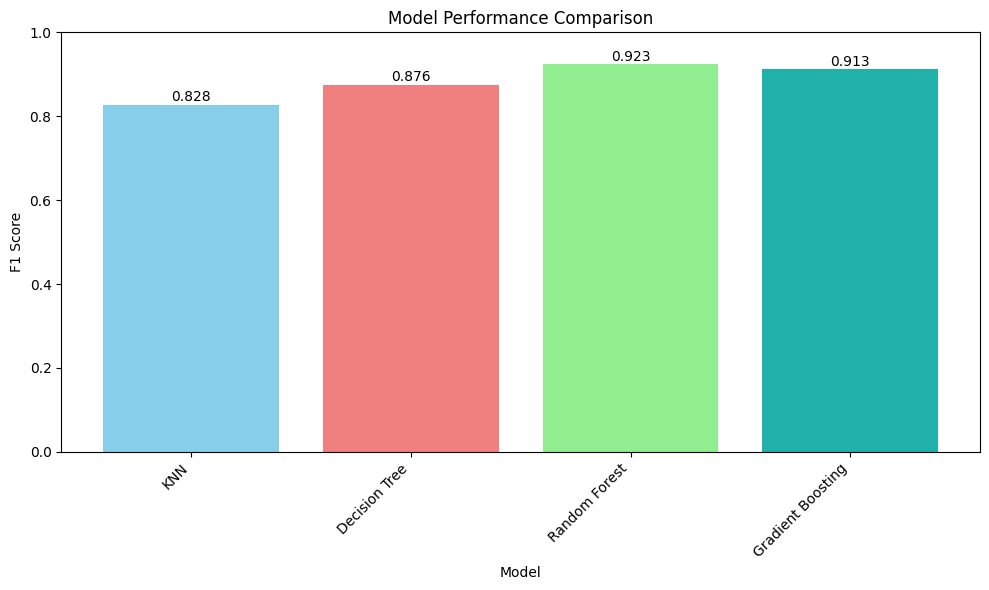

In [65]:
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores['Model'], f1_scores['F1 Score'], color=['skyblue', 'lightcoral', 'lightgreen', 'lightseagreen'])
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("Model Performance Comparison")

# Add F1 scores on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.ylim(0, 1) # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

##Hyperparameter tuning

In [66]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


In [67]:
import optuna
def objective(trial):
    # Suggest the model to use
    model_type = trial.suggest_categorical('model', ['DecisionTree', 'RandomForest', 'GradientBoosting'])

    if model_type == 'DecisionTree':
        # Decision Tree parameters
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=0
        )

    elif model_type == 'RandomForest':
        # Random Forest parameters
        n_estimators = trial.suggest_int('n_estimators', 100, 1000,10)
        max_depth = trial.suggest_int('max_depth', 3, 20,2)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=0
        )

    else:  # Gradient Boosting
        # Gradient Boosting parameters
        n_estimators = trial.suggest_int('n_estimators', 100, 1000,20)
        max_depth = trial.suggest_int('max_depth', 3, 10,2)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)

        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            random_state=0
        )

    # Create pipeline with preprocessor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate F1 Score (weighted for class imbalance)
    f1 = f1_score(y_test, y_pred, average='weighted')

    return f1




In [68]:
# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-12-01 06:48:46,657] A new study created in memory with name: no-name-ed31bb61-a4d9-4393-b817-c643c1da08fb
[I 2024-12-01 06:48:51,045] Trial 0 finished with value: 0.8846321756109722 and parameters: {'model': 'RandomForest', 'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8846321756109722.
[I 2024-12-01 06:48:51,102] Trial 1 finished with value: 0.8863871637972478 and parameters: {'model': 'DecisionTree', 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8863871637972478.
[I 2024-12-01 06:48:51,724] Trial 2 finished with value: 0.9121317244760109 and parameters: {'model': 'RandomForest', 'n_estimators': 110, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.9121317244760109.
[I 2024-12-01 06:48:55,315] Trial 3 finished with value: 0.8877368527696015 and parameters: {'model': 'RandomForest', 'n_estimators': 630, 'max_depth':

In [69]:
# Best trial
print("Best trial:")
print(f"  Value: {study.best_value}")
print(f"  Params: {study.best_params}")

Best trial:
  Value: 0.9381635387318852
  Params: {'model': 'GradientBoosting', 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2506947754716594, 'subsample': 0.8300197902802287}


In [71]:
best_params = {'model': 'GradientBoosting', 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2506947754716594, 'subsample': 0.8300197902802287}

In [74]:
from sklearn.metrics import f1_score, classification_report
model_type = best_params['model']

if model_type == 'DecisionTree':
    model = DecisionTreeClassifier(**{k: v for k, v in best_params.items() if k != 'model'}, random_state=0)
elif model_type == 'RandomForest':
    model = RandomForestClassifier(**{k: v for k, v in best_params.items() if k != 'model'}, random_state=0)
else:  # Gradient Boosting
    model = GradientBoostingClassifier(**{k: v for k, v in best_params.items() if k != 'model'}, random_state=0)

best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the best pipeline using the training data
best_pipeline.fit(X_train, y_train)

# Now you can make predictions using the fitted pipeline
y_pred_best = best_pipeline.predict(X_test)

# Calculate and print the weighted F1 score
weighted_f1 = f1_score(y_test, y_pred_best, average='weighted')
print(f'Weighted F1 Score: {weighted_f1}')

# Print the classification report for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred_best)
print(f'Classification Report:\n{class_report}')

Weighted F1 Score: 0.9381635387318852
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.97      0.95        86
           2       0.89      0.88      0.89        93
           3       0.91      0.90      0.90        88
           4       0.93      0.87      0.90        79
           5       0.93      0.95      0.94       102
           6       0.96      1.00      0.98        88
           7       1.00      0.99      0.99        98

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



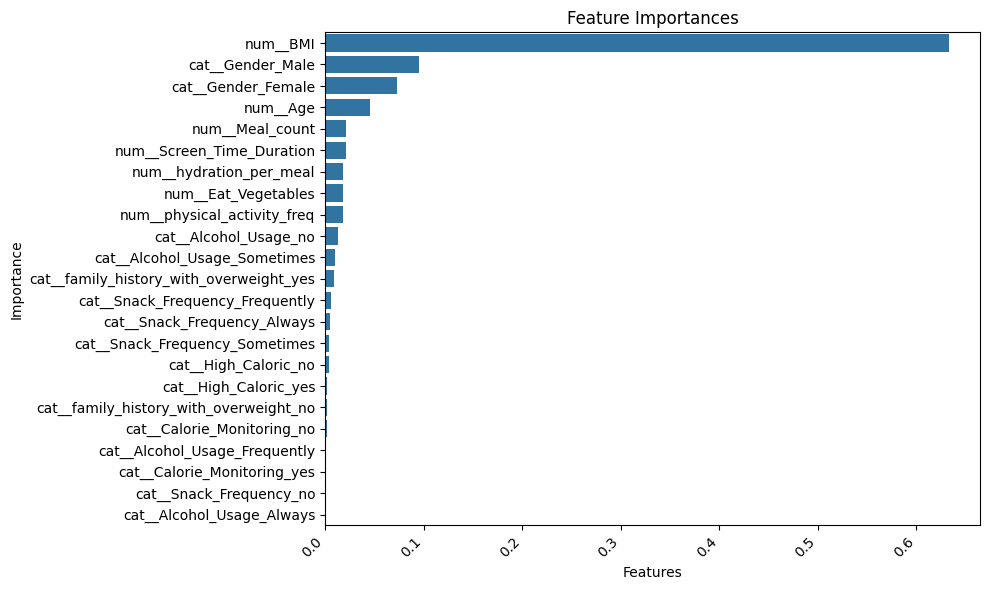

In [73]:
importances = best_pipeline.named_steps['classifier'].feature_importances_
feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()


df_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
df_importances = df_importances.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=df_importances)
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()